In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
mca_df = pd.read_csv('../3_soc_comple/soc_comple.csv')

def determine_risk(row):
    aioe = row['AIOE']
    comple = row['Complementarity']
    
    if aioe < 0:
        return 'Low Exposure'
    elif comple < mca_df['Complementarity'].median():
        return 'Automatable'
    elif comple > mca_df['Complementarity'].median():
        return 'Augmentable'
    
mca_df['Classification'] = mca_df.apply(determine_risk, axis=1)

# I. How Education Relates to Job Exposure and Augmentability to AI

In [338]:
proportions = mca_df.groupby('Educational Pathway')['Classification'].value_counts(
    normalize=True).reset_index()
pivot_df = proportions.pivot(index='Educational Pathway', columns='Classification', values='proportion')
(pivot_df).round(2)

Classification,Augmentable,Automatable,Low Exposure
Educational Pathway,,,
Higher Education,0.46,0.34,0.21
Not Higher Education,0.08,0.15,0.77


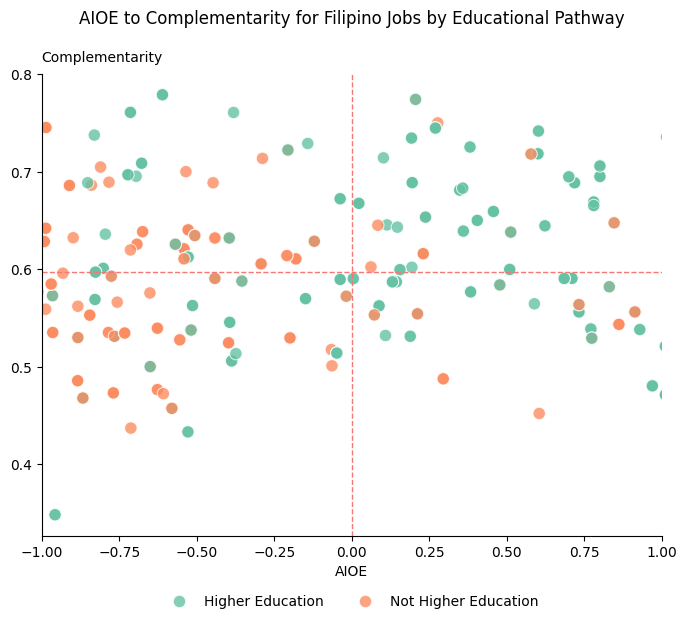

In [339]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=mca_df,
    x='AIOE',
    y='Complementarity',
    hue='Educational Pathway',
    palette='Set2',
    alpha=0.8,
    s=80
)

plt.legend(
    loc="upper center",       # place above or below plot
    bbox_to_anchor=(0.5, -0.1), # shift below the axes
    ncol=2,                   # number of columns
    frameon=False             # remove legend box outline
)

# Axes limits and lines
plt.xlim(-1, 1)
#plt.ylim(-3, 3)
plt.axvline(x=0, color="#f77777", linestyle='--', linewidth=1)
plt.axhline(y=mca_df['Complementarity'].median(), color='#f77777', linestyle='--', linewidth=1)

# Labels
plt.xlabel('AIOE')
plt.ylabel('Complementarity', rotation=0, ha='left')
plt.gca().yaxis.set_label_coords(0, 1.02)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Title
plt.title('AIOE to Complementarity for Filipino Jobs by Educational Pathway\n\n')

plt.show()

# II. How Sectors Relates to Job Exposure and Augmentability to AI

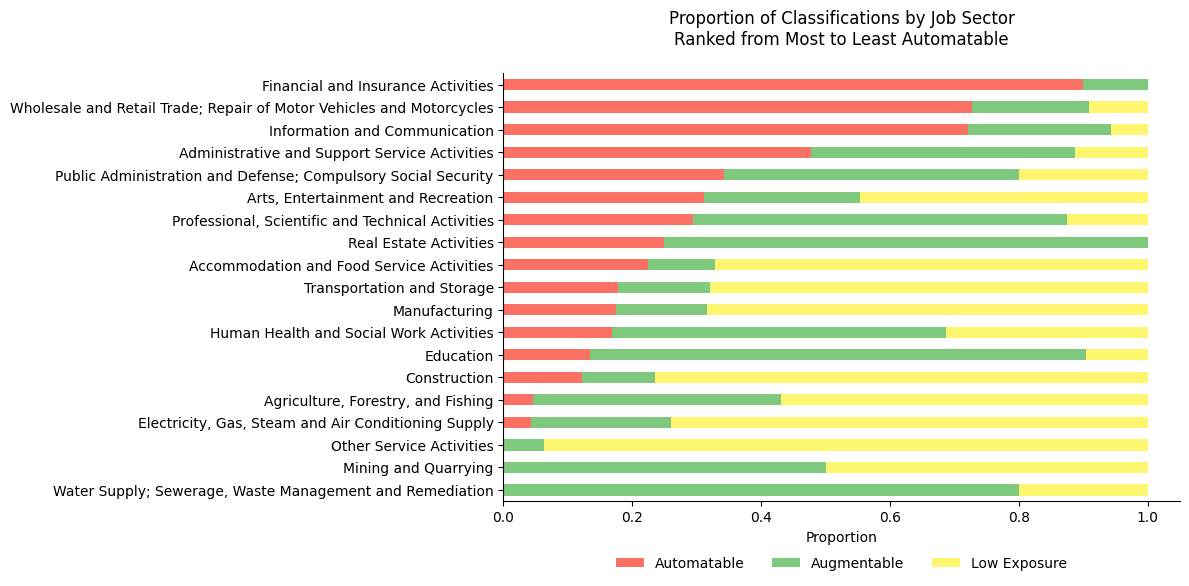

In [340]:
#classification_order = ['Low Exposure', 'Augmentable', 'Automatable']
classification_order = ['Automatable', 'Augmentable', 'Low Exposure']

# Get proportions
proportions = mca_df.groupby('Job Sector')['Classification'] \
                    .value_counts(normalize=True) \
                    .reset_index()

# Get the proportions
proportions = mca_df.groupby('Job Sector')['Classification'].value_counts(
    normalize=True).reset_index()
pivot_df = proportions.pivot(index='Job Sector', columns='Classification', values='proportion')

# Make sure the columns are in the desired order
pivot_df = pivot_df[classification_order]
pivot_df.fillna(0, inplace=True)
pivot_df.sort_values(by=['Automatable'], ascending=[True], inplace=True)

# Plot stacked bar chart
pivot_df.plot(kind='barh', 
              stacked=True, 
              figsize=(12,6), 
              color=["#fb7164",'#7fc97f', "#fdf66e"],
              #color=["#fdf66e",'#7fc97f',"#fb7164"]
              )

# pretty graph pls
plt.xlabel('Proportion')
plt.ylabel('')
plt.title('Proportion of Classifications by Job Sector\nRanked from Most to Least Automatable\n')
plt.legend(
    loc="upper center",       # place above or below plot
    bbox_to_anchor=(0.5, -0.1), # shift below the axes
    ncol=3,                   # number of columns
    frameon=False             # remove legend box outline
)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

We will now develop a metric to summarize the risk of replacement at the occupation level to AI. This is called the C-AIOE, formally defined as:
$$\text{C-AIOE}_i = \text{AIOE}_i \cdot (1 - (\theta_i - \theta_{\text{MIN}})),$$

where $i$ indexes the job, $\theta_i$ is complementarity to AI, and $\theta_{\text{MIN}}$ is minimum value of $\theta_i$ across all occupations. Overall, jobs with higher C-AIOE because of higher AIOE or lower complementarity are more likely to face AI replacement. 

In [341]:
min_comple = mca_df['Complementarity'].min()
factor = 1 - (mca_df['Complementarity'] - min_comple)
mca_df['C-AIOE'] = mca_df['AIOE'] * factor

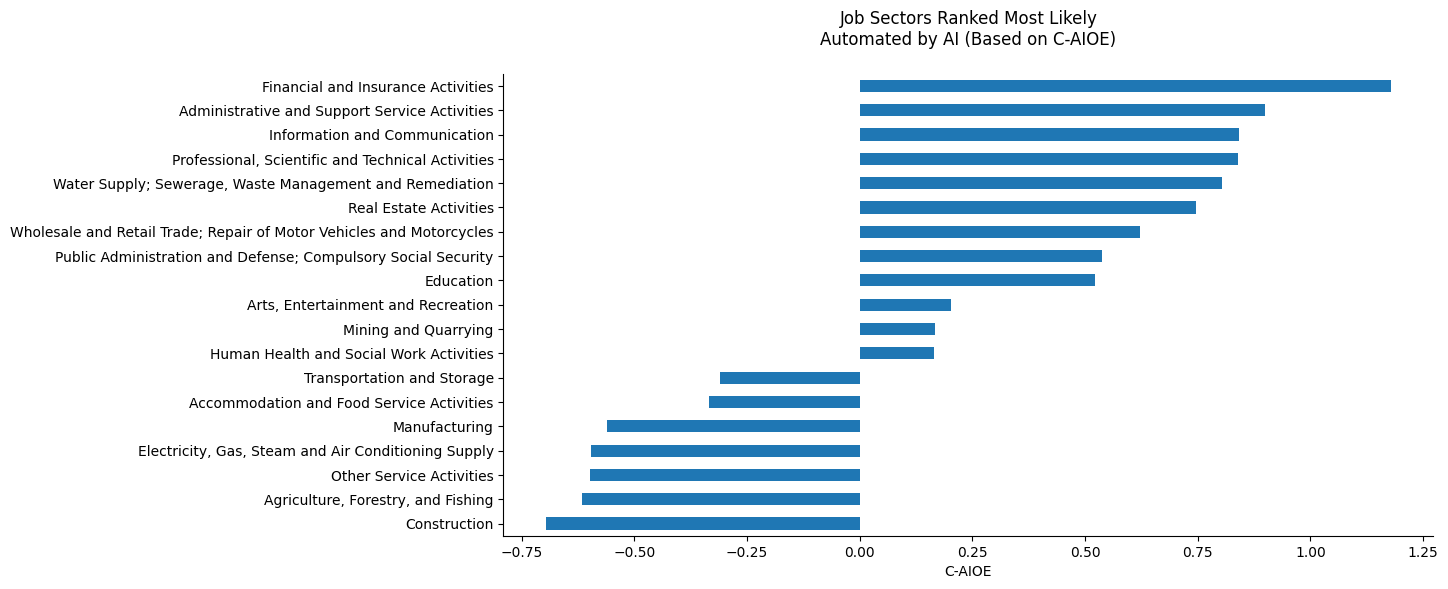

In [343]:
plt.figure(figsize=(12, 6))
mca_df.groupby('Job Sector')['C-AIOE'].median().sort_values().plot(kind='barh')

# pretty graph pls
plt.xlabel('C-AIOE')
plt.ylabel('')
plt.title('Job Sectors Ranked Most Likely\nAutomated by AI (Based on C-AIOE)\n')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
